In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
train = pd.read_csv('../data/adult.data.csv', na_values = ' ?')
test = pd.read_csv('../data/adult.test.csv', na_values = ' ?')

In [3]:
train.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [4]:
test.head()

age   workclass      education  education-num       marital-status  \
0   25     Private           11th              7        Never-married   
1   38     Private        HS-grad              9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm             12   Married-civ-spouse   
3   44     Private   Some-college             10   Married-civ-spouse   
4   18         NaN   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                 NaN    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              50   United-States   <=50K  
2             0              40   United-States    >50K  
3             0              40   United-States    >50K  
4             0              30   United-States   <=50K

In [5]:
train.shape, test.shape

((32561, 15), (16281, 14))

In [6]:
train.iloc[:30]

age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acdm             12   
14   40            Private  121772      Assoc-voc             11   
15   34            Private  245487        7th-8th              4   
16   25   Self-emp-not-inc  176756        HS-grad              9   
17   32            Private  186824        HS-grad              9   
18   38            Private   28887           11th              7   
19   43   Self-emp-not-inc  292175        Masters             14   
20   40            Private  193524      Doctorate             16   
21   54            Private  302146        HS-grad              9   
22   35        Federal-gov   76845            9th              5   
23   43            Private  117037           11th              7   
24   59            Private  109015        HS-grad              9   
25   56          Local-gov  216851      Bachelors             13   
26   19            Private  168294        HS-grad              9   
27   54                NaN  180211   Some-college             10   
28   39            Private  367260        HS-grad              9   
29   49            Private  193366        HS-grad              9   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7       Married-civ-spouse     Exec-managerial         Husband   
8            Never-married      Prof-specialty   Not-in-family   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse     Exec-managerial         Husband   
11      Married-civ-spouse      Prof-specialty         Husband   
12           Never-married        Adm-clerical       Own-child   
13           Never-married               Sales   Not-in-family   
14      Married-civ-spouse        Craft-repair         Husband   
15      Married-civ-spouse    Transport-moving         Husband   
16           Never-married     Farming-fishing       Own-child   
17           Never-married   Machine-op-inspct       Unmarried   
18      Married-civ-spouse               Sales         Husband   
19                Divorced     Exec-managerial       Unmarried   
20      Married-civ-spouse      Prof-specialty         Husband   
21               Separated       Other-service       Unmarried   
22      Married-civ-spouse     Farming-fishing         Husband   
23      Married-civ-spouse    Transport-moving         Husband   
24                Divorced        Tech-support       Unmarried   
25      Married-civ-spouse        Tech-support         Husband   
26           Never-married        Craft-repair       Own-child   
27      Married-civ-spouse                 NaN 

In [7]:
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
test.isnull().sum()

age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [9]:
#Xoa nhung dong NaN o tap train
train.dropna(inplace =True)

In [10]:
#Xoa NaN o tap test
test.dropna(inplace=True)

In [12]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [13]:
test.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
#Xoa cot 'fnlwgt' trong tap train
train.drop('fnlwgt', axis=1, inplace=True)

In [18]:
#Noi tap train va test lai voi nhau
data = train.append(test, ignore_index=True)

In [19]:
data.head()

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K

In [20]:
data.shape

(45222, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


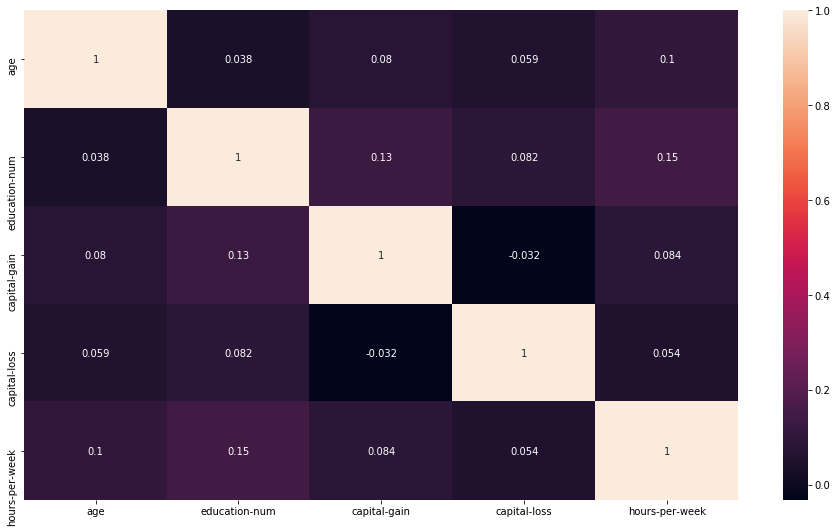

In [24]:
#Khao sat do tuong dong giua cac cot bang Pearson
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [25]:
#Tach du lieu thanh 2 phan: feature va label
features = data.drop('income', axis=1)
labels = data['income']

In [26]:
features.shape, labels.shape

((45222, 13), (45222,))

In [28]:
#Chuyen doi cac cot khong phai dang so ve dang one-hot vector
feature_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)

In [29]:
feature_onehot

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
45217   33             13             0             0              40   
45218   39             13             0             0              36   
45219   38             13             0             0              50   
45220   44             13          5455             0              40   
45221   35             13             0             0              60   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
45217                       0                     0                   1   
45218                       0                     0                   1   
45219                       0                     0                   1   
45220                       0                     0                   1   
45221                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
45217                        0                            0  ...   
45218                        0                            0  ...   
45219                        0                            0  ...   
45220                        0                            0  ...   
45221                        1                            0  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
45217                         0                            0   
45218                         0                            0   
45219                         0                            0   
45220                         0                            0   
45221                         0                            0   

       native-country_ Scotland  native-country_ South  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
45217                         0                      0   
45218                         0                      0   
45219                         0                      0   
45220                         0                      0   
45221

In [30]:
# Tach du lieu thanh 2 phan train va test nhu ban dau
X_train = feature_onehot[:30162]
X_test = feature_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
tree_pred = clf.predict(X_test)

In [35]:
tree_score = metrics.accuracy_score(tree_pred, y_test)

In [38]:
print('Accuracy:', tree_score)
print('Report:', metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



In [39]:
#Tinh toan ma tran nham lan
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

In [40]:
tree_cm

array([[10031,  1329],
       [ 1419,  2281]], dtype=int64)

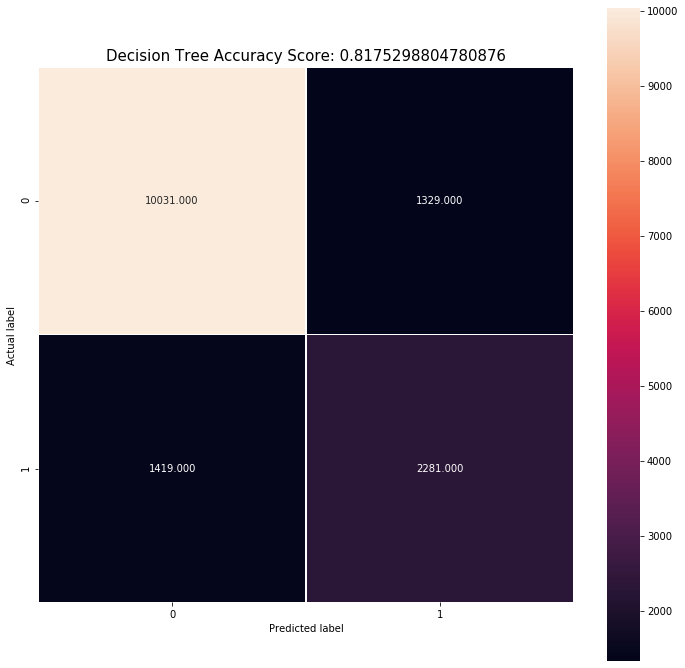

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt='.3f', linewidths=.5, square=True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score);
plt.title(title, size=15);

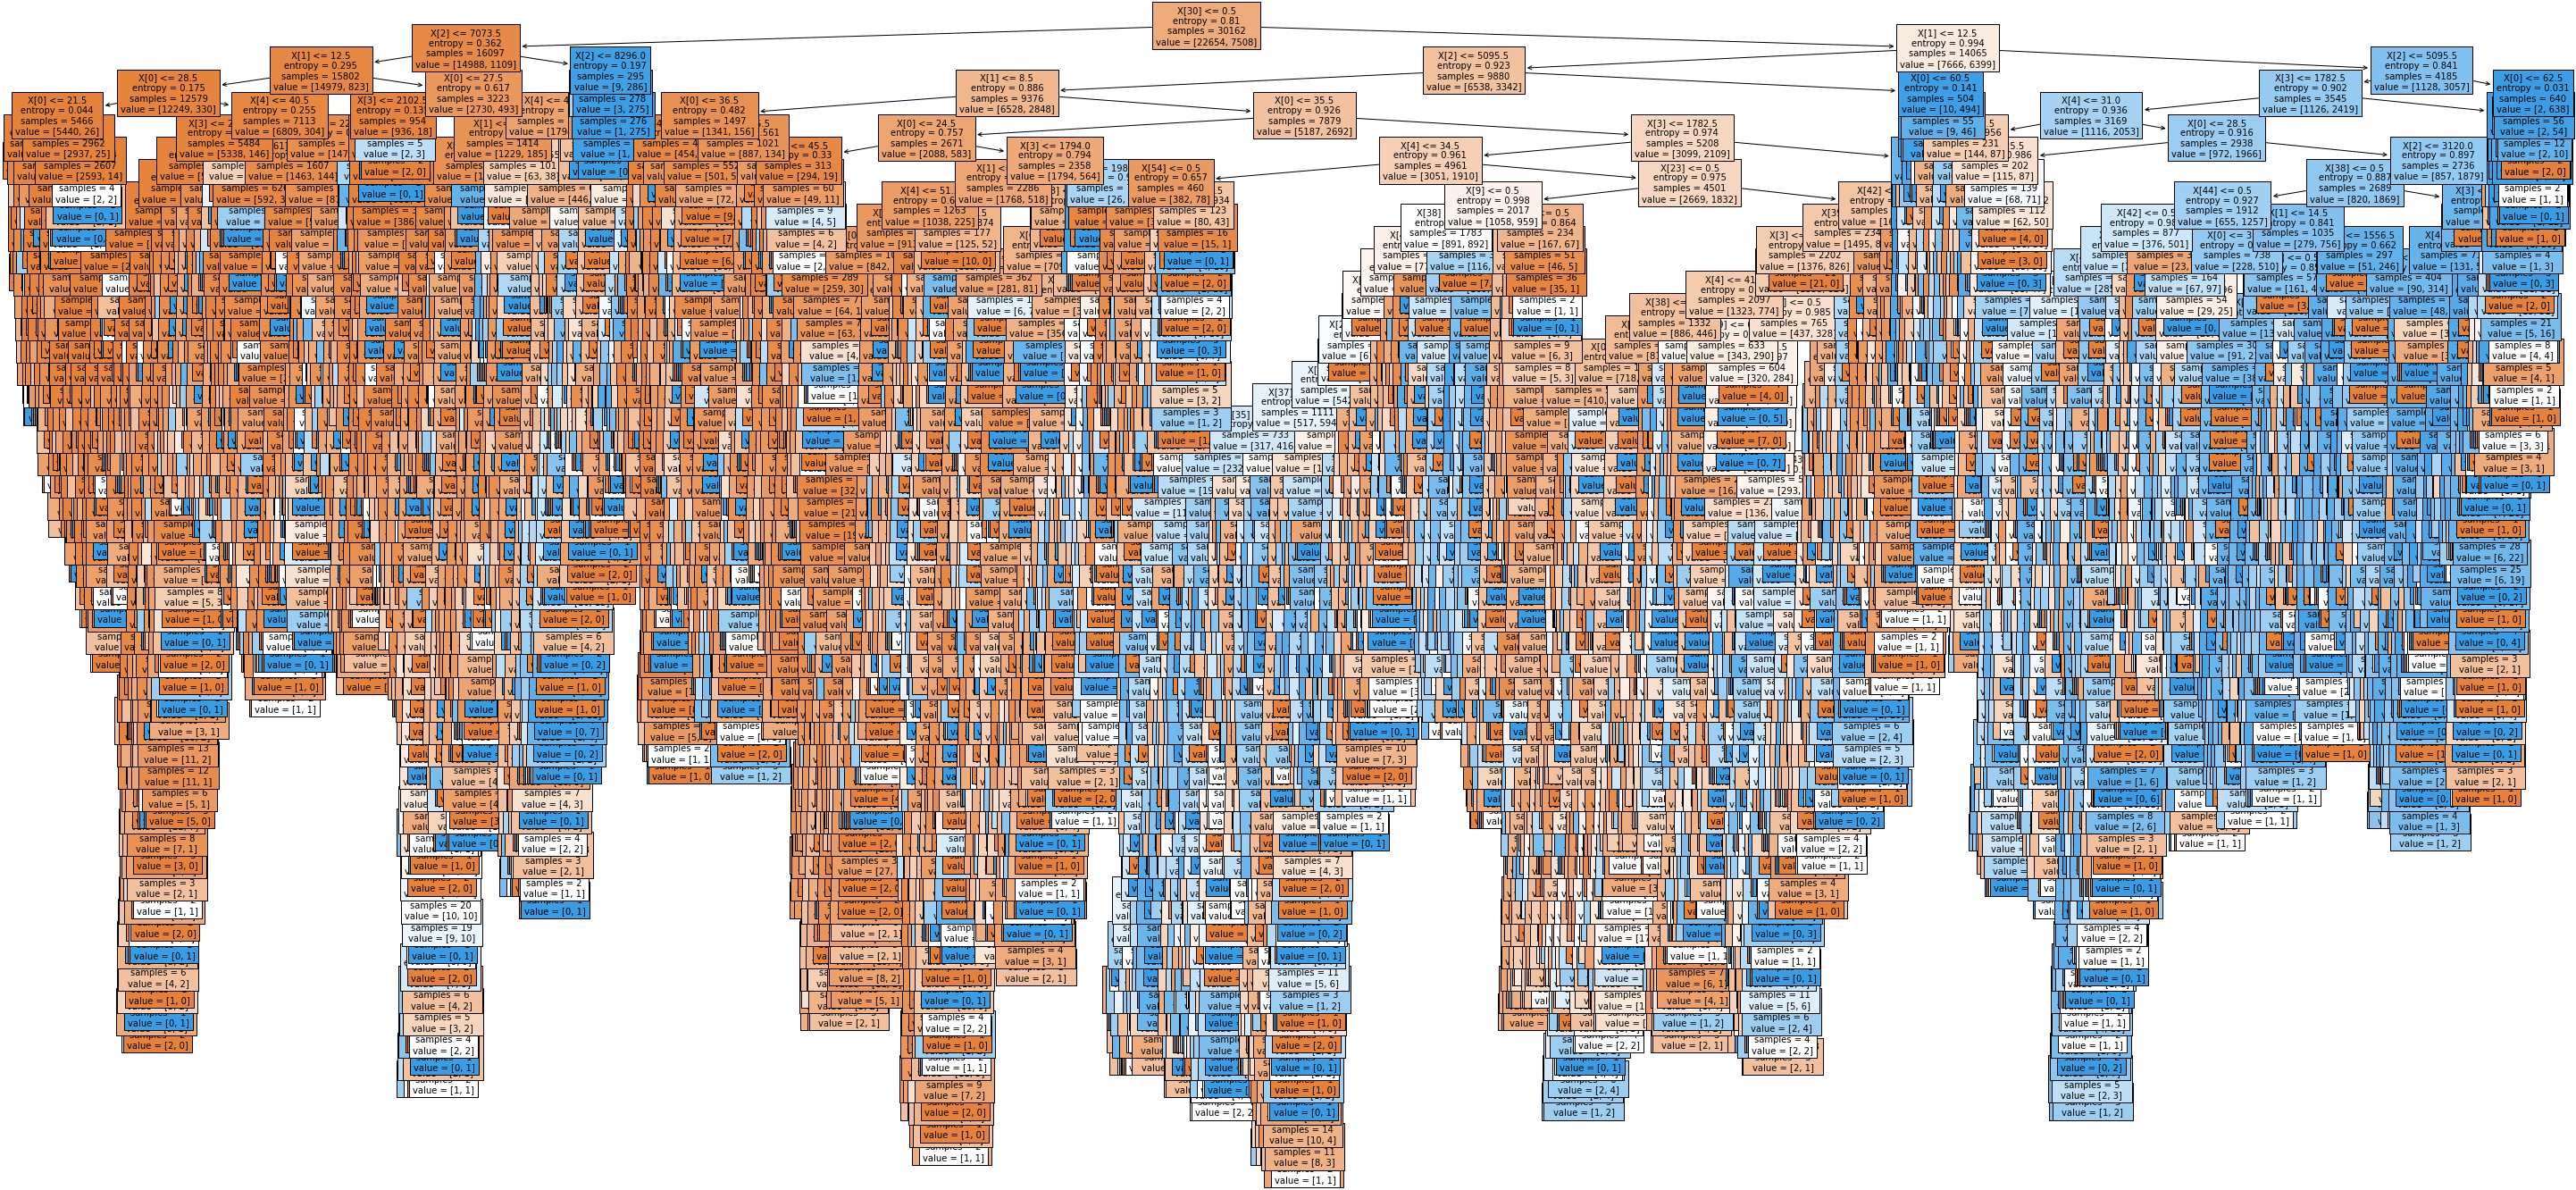

In [45]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('', dpi=150)
plt.show()

In [46]:
#Cau 8
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=0)

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
pred = clf.predict(X_test)

In [49]:
print('Accuracy:', metrics.accuracy_score(pred, y_test))
print('Report:', metrics.classification_report(pred, y_test))

Accuracy: 0.8122841965471448
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88     11485
        >50K       0.60      0.62      0.61      3575

    accuracy                           0.81     15060
   macro avg       0.74      0.75      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [50]:
tree_cm = metrics.confusion_matrix(y_test, pred)

Text(0.5, 1, 'Decision Tree Accuracy score 0.8122841965471448')

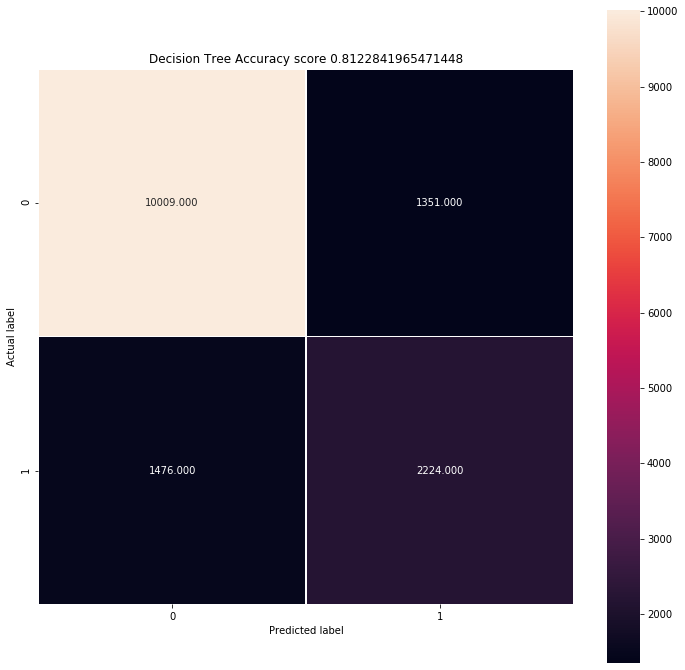

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt='.3f', linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy score {0}'.format(metrics.accuracy_score(pred, y_test)))

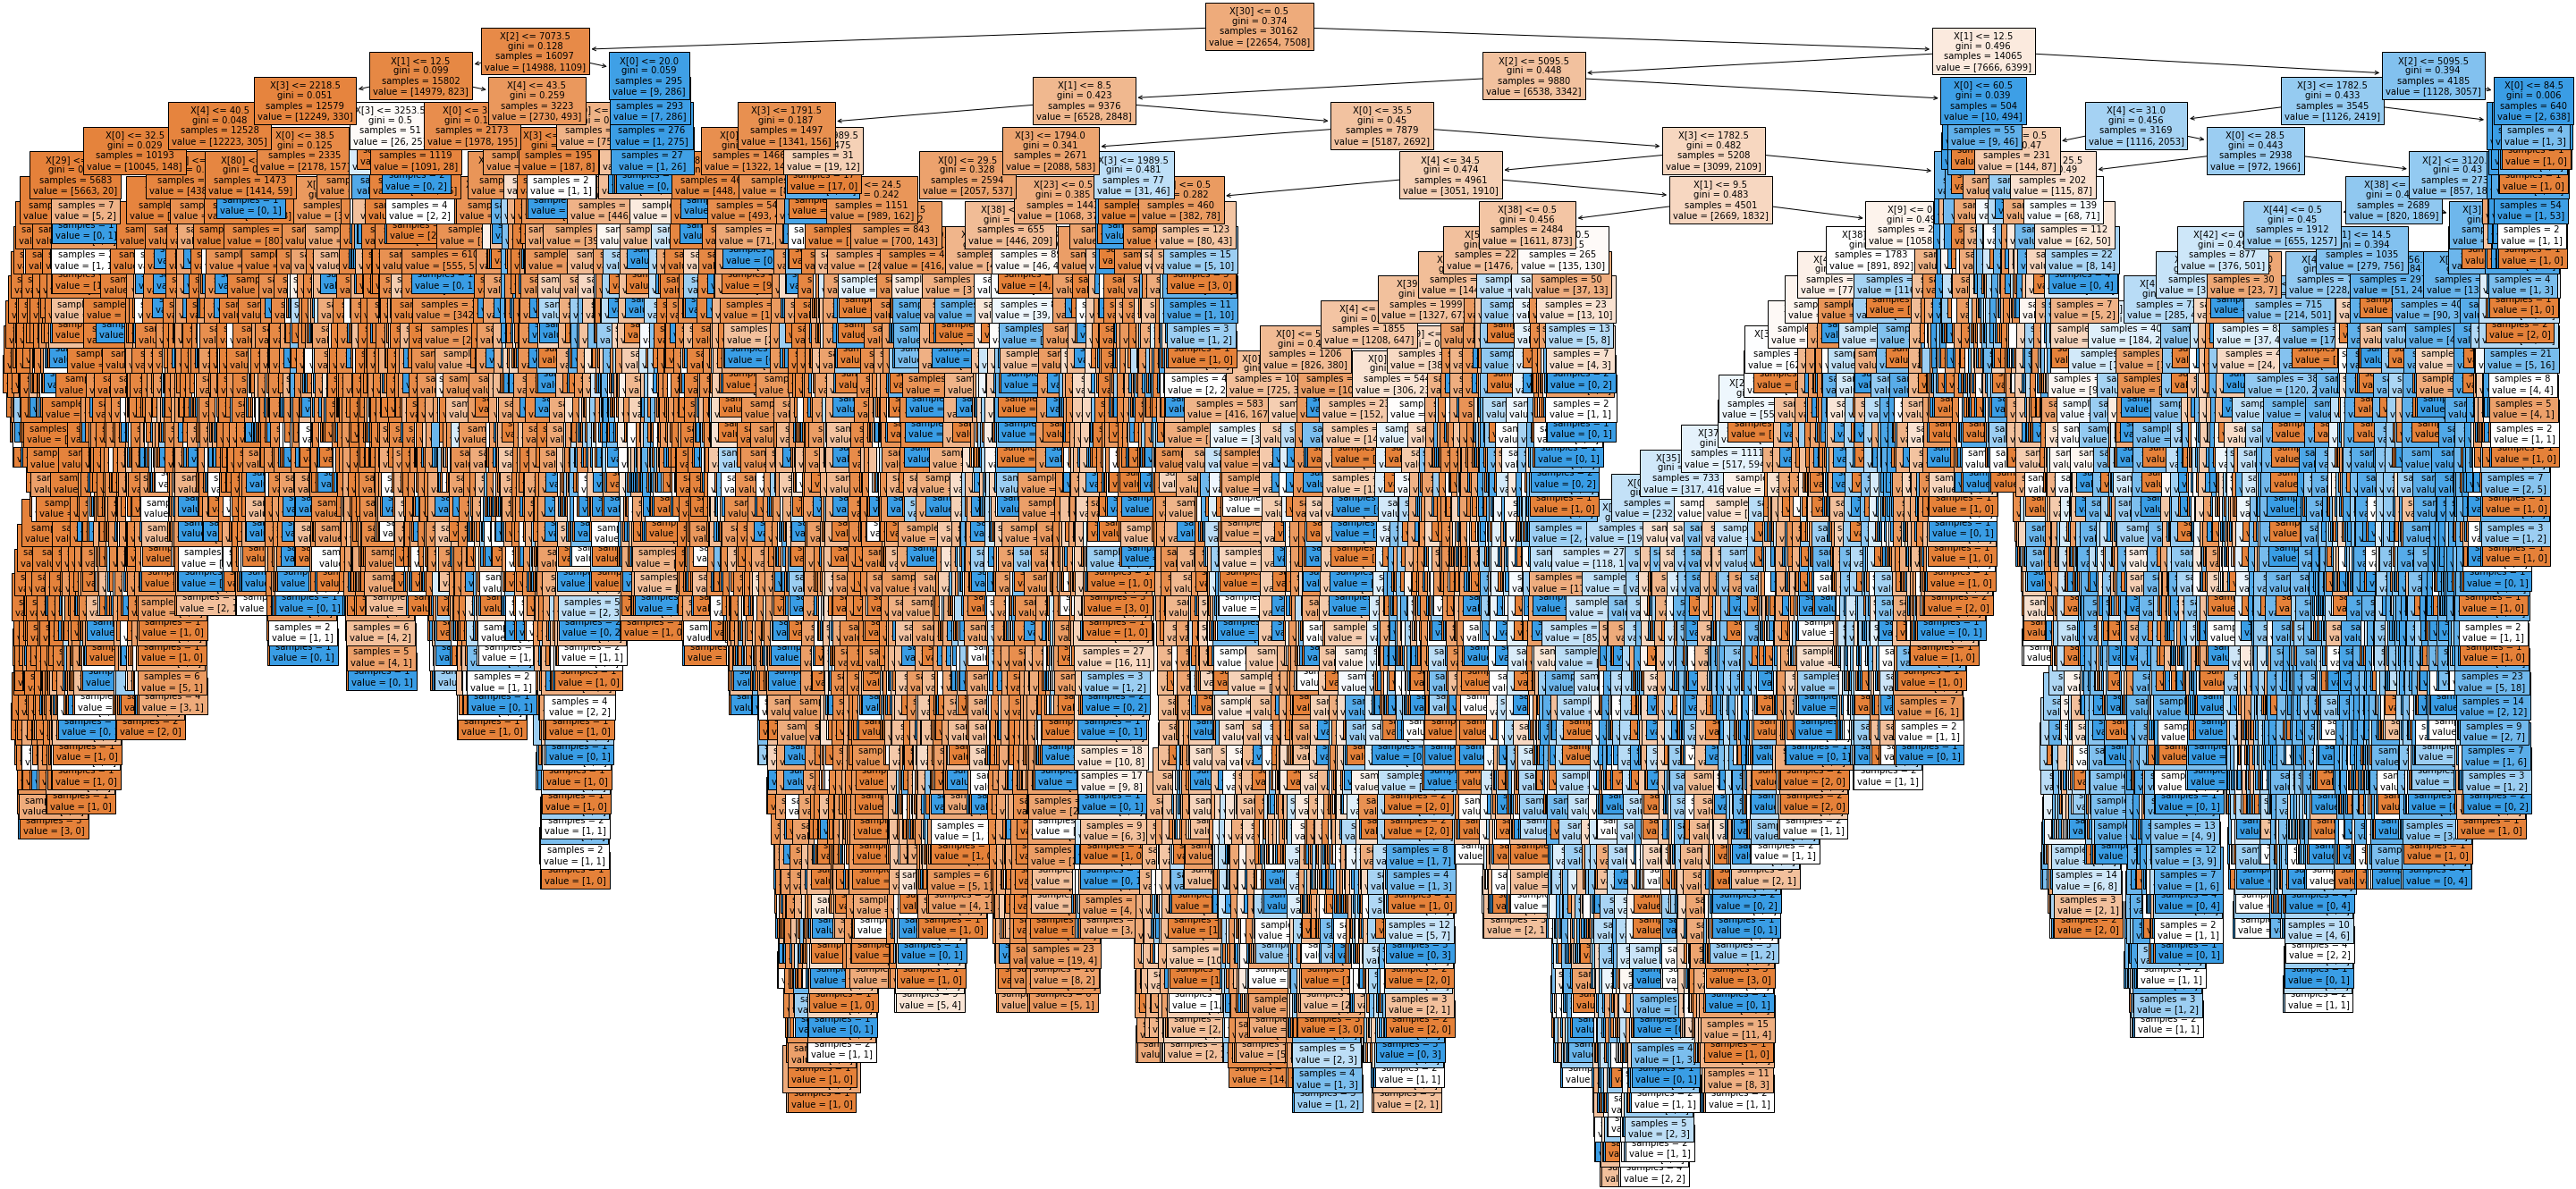

In [52]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=150)
plt.show()

In [53]:
#cau 9
gnb = GaussianNB()

In [55]:
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [56]:
bayes_score = metrics.accuracy_score(bayes_pred, y_test)
print('Accuracy: ', bayes_score)
print('Report: ', metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.8029216467463479
Report:                precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



In [57]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

Text(0.5, 1, 'Naive Bayes Accuracy score 0.803')

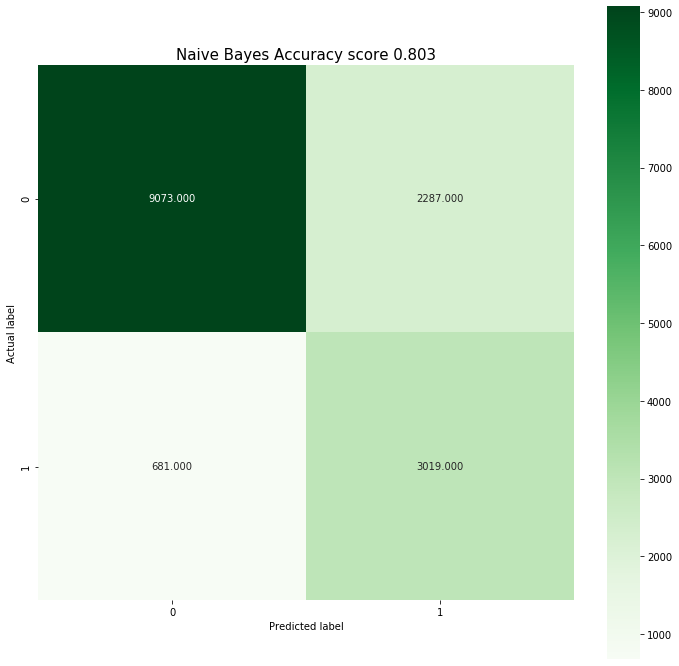

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, square=True, cmap='Greens', fmt='.3f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Naive Bayes Accuracy score {0}'.format(round(bayes_score,3))
plt.title(title, size=15)

In [63]:
X_train

age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
30157   27             12             0             0              38   
30158   40              9             0             0              40   
30159   58              9             0             0              40   
30160   22              9             0             0              20   
30161   52              9         15024             0              40   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
30157                       0                     0                   1   
30158                       0                     0                   1   
30159                       0                     0                   1   
30160                       0                     0                   1   
30161                       0                     0                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                            0                            0  ...   
1                            0                            1  ...   
2                            0                            0  ...   
3                            0                            0  ...   
4                            0                            0  ...   
...                        ...                          ...  ...   
30157                        0                            0  ...   
30158                        0                            0  ...   
30159                        0                            0  ...   
30160                        0                            0  ...   
30161                        1                            0  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
30157                         0                            0   
30158                         0                            0   
30159                         0                            0   
30160                         0                            0   
30161                         0                            0   

       native-country_ Scotland  native-country_ South  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
30157                         0                      0   
30158                         0                      0   
30159                         0                      0   
30160                         0                      0   
30161